<a href="https://colab.research.google.com/github/IngerMasha/Hackathon---Data-Analyst/blob/main/Hackathon_Subject_2_Analyzing_Medical_Insurance_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)
first_rows = data.head()
shape = data.shape
info = data.info()

first_rows, shape, info

# print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 (1338, 7),
 None)

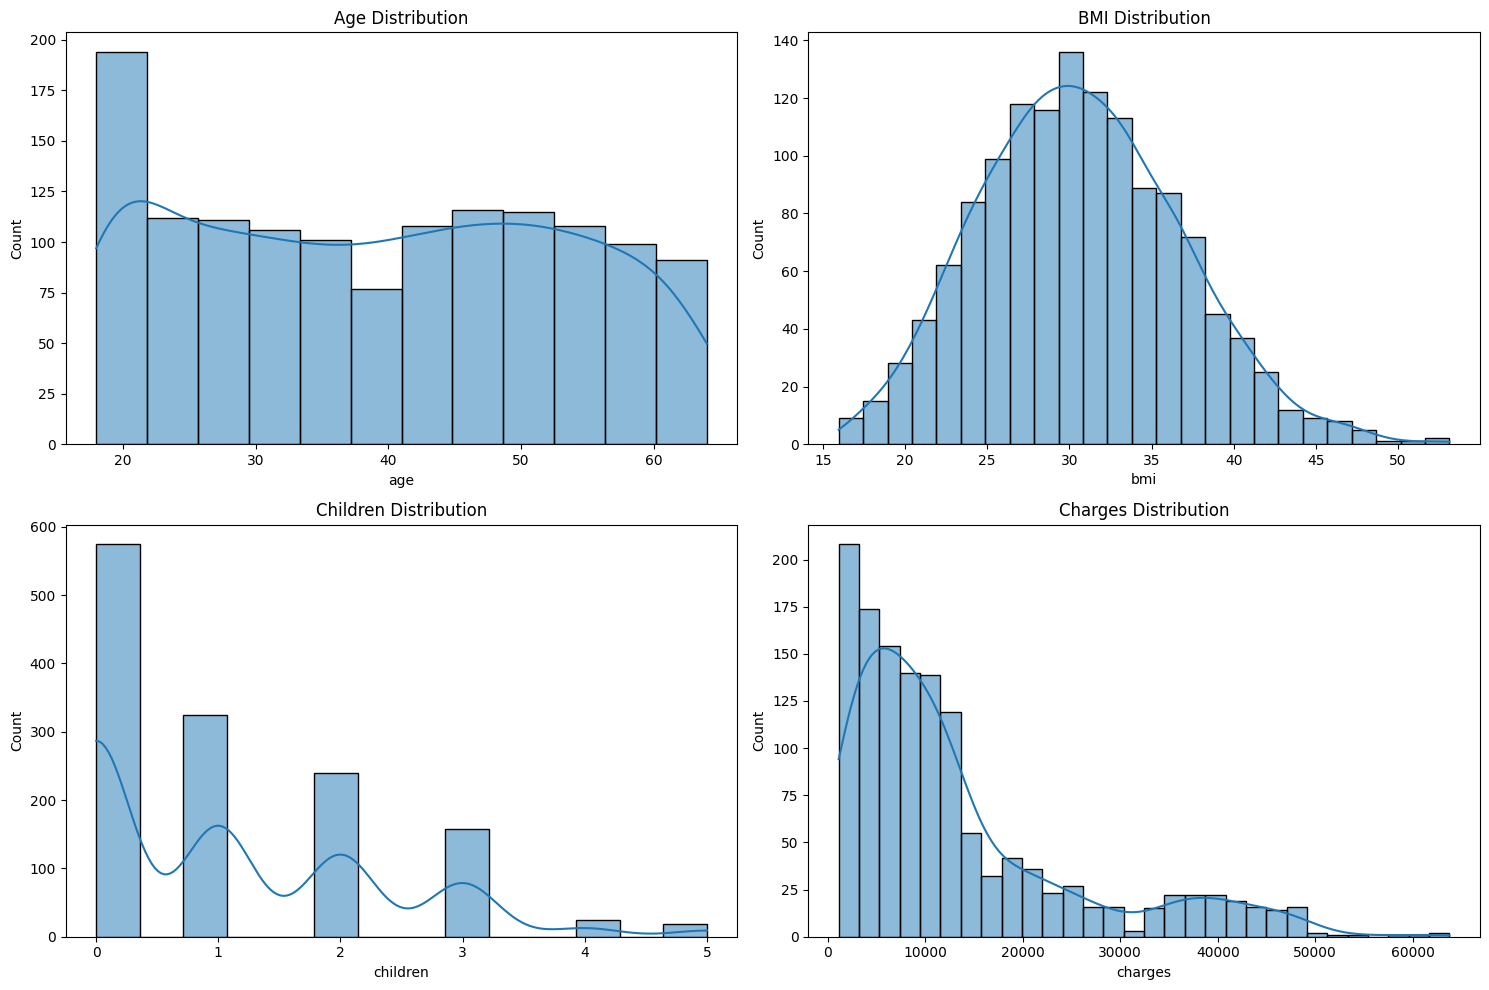

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

desc_stats = data.describe()
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data['age'], kde=True, ax=axs[0, 0]).set(title='Age Distribution')
sns.histplot(data['bmi'], kde=True, ax=axs[0, 1]).set(title='BMI Distribution')
sns.histplot(data['children'], kde=True, ax=axs[1, 0]).set(title='Children Distribution')
sns.histplot(data['charges'], kde=True, ax=axs[1, 1]).set(title='Charges Distribution')

plt.tight_layout()
plt.show()

desc_stats


   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


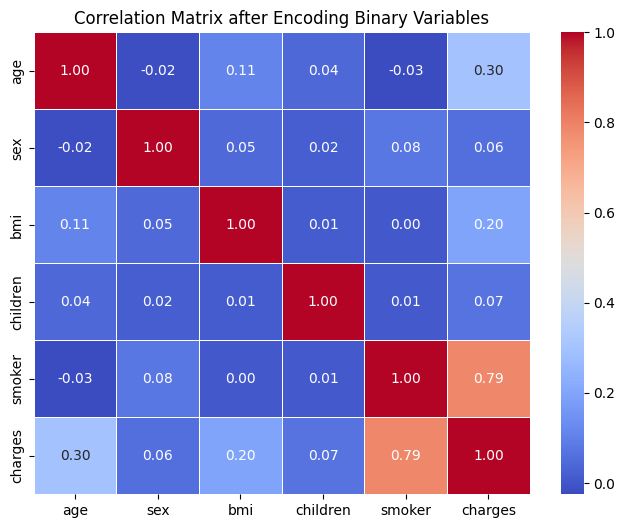

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [18]:

data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
print(data.head())
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix after Encoding Binary Variables')
plt.show()

correlation_matrix


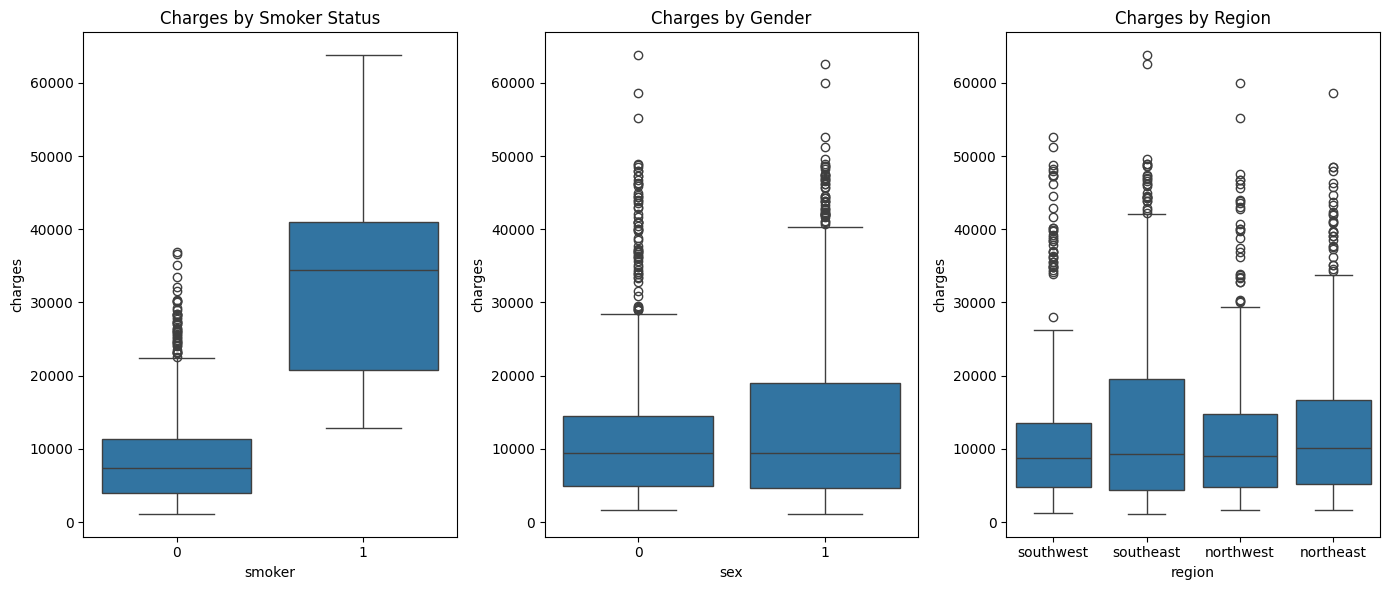

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')

plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')

plt.tight_layout()
plt.show()


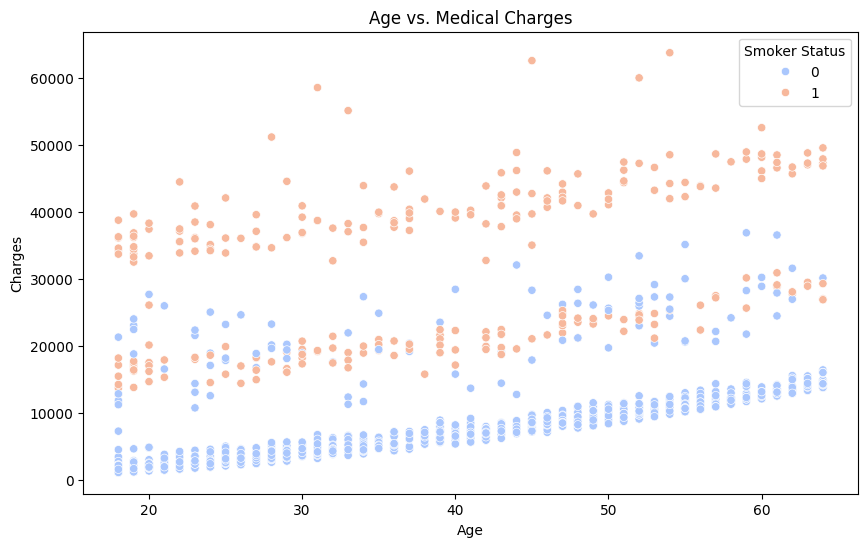

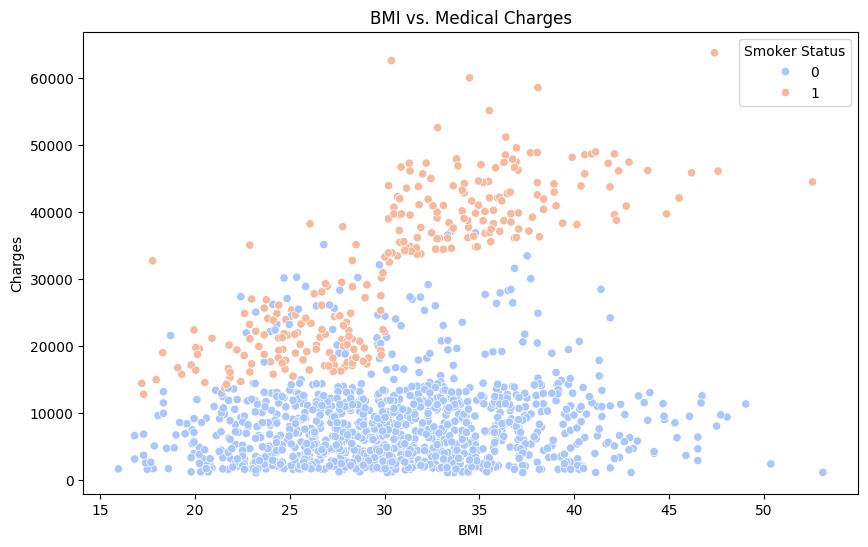

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker', palette='coolwarm')
plt.title('Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette='coolwarm')
plt.title('BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()


<ipython-input-21-6c0a824c7fd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=data, palette='coolwarm')


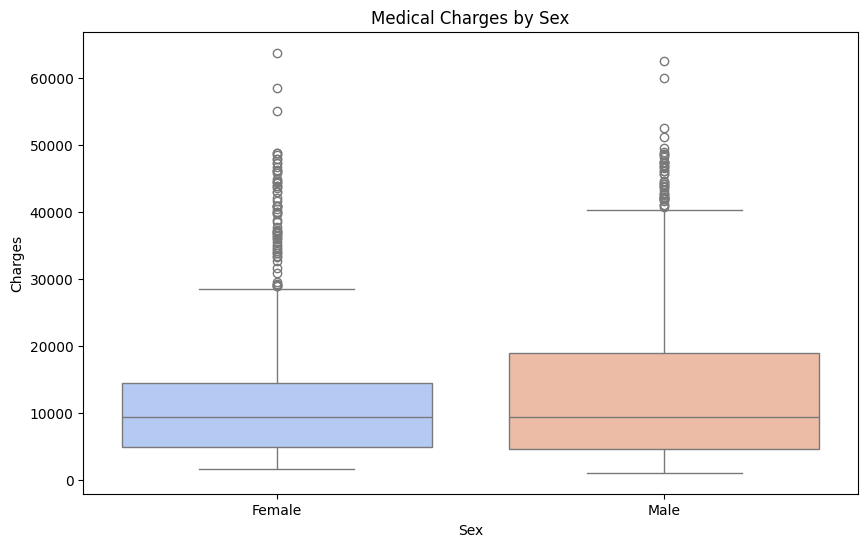

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data, palette='coolwarm')
plt.title('Medical Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

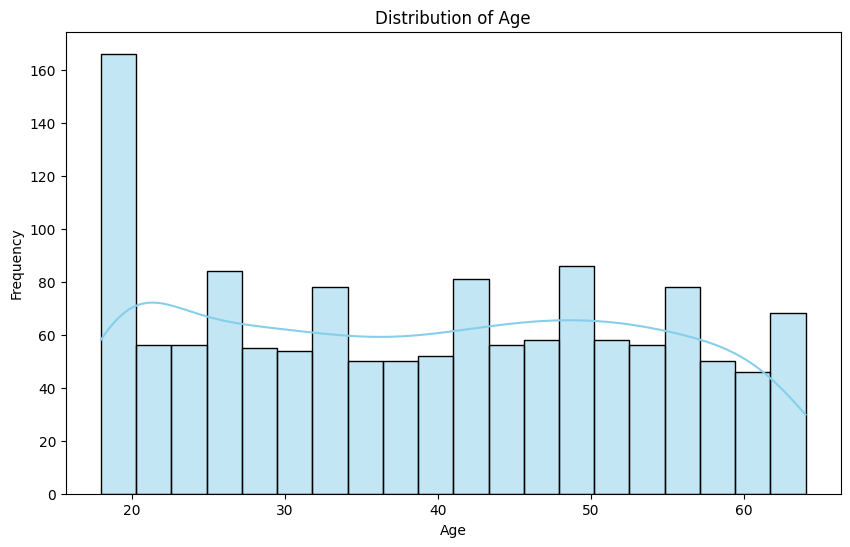

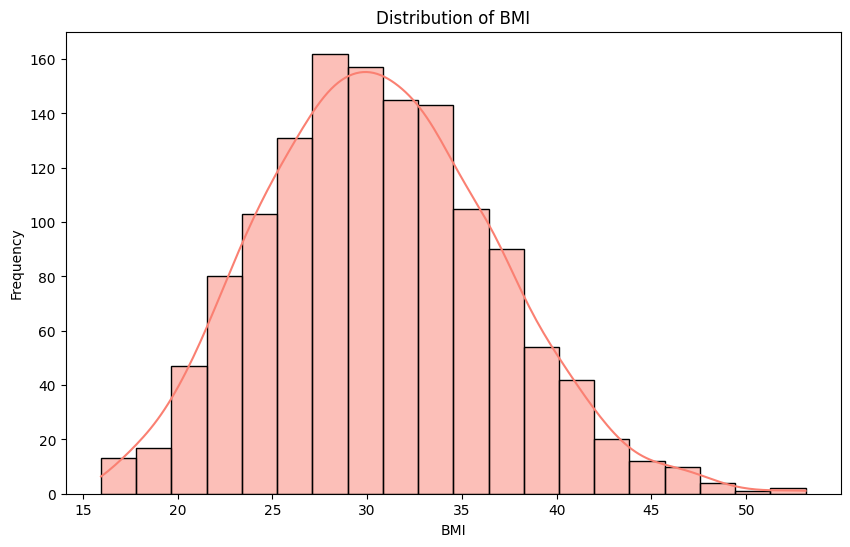

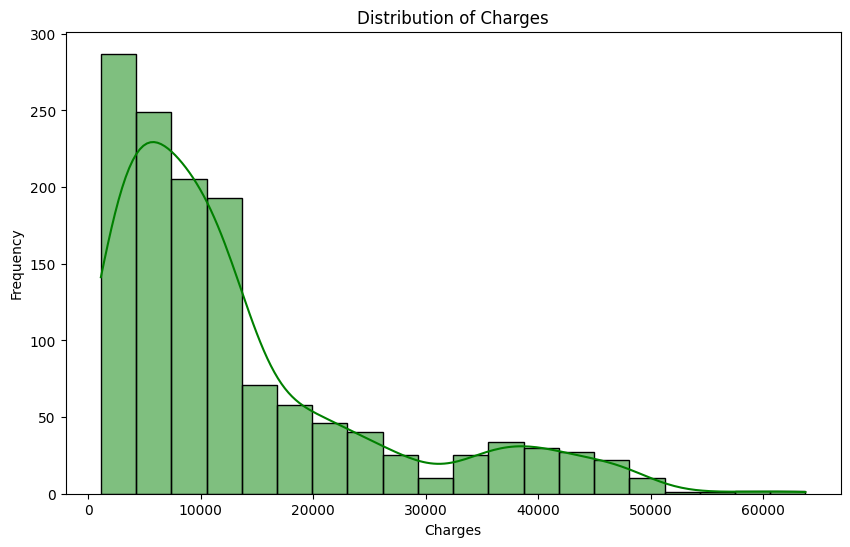

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=20, kde=True, color='green')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
